In [4]:
import numpy as np

In [5]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [7]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key]= np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [8]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [17]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    
    z = np.dot(x,w)
    a = sigmoid(z)
    activations[i] = a

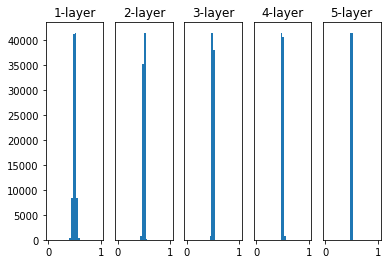

In [29]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [15]:
w = np.random.randn(node_num, node_num) * 0.01

In [16]:
w

array([[-2.04942999e-03,  4.15579442e-03, -5.64491140e-03, ...,
        -3.65471153e-03,  1.98367234e-02, -7.84462440e-03],
       [ 1.06557386e-02,  1.13027508e-02,  7.87782077e-03, ...,
         2.02697590e-02,  3.78635075e-03, -1.17057732e-02],
       [ 6.32668612e-03,  9.02329318e-03,  1.99822334e-03, ...,
         9.63643951e-03, -8.67864832e-03,  1.92913401e-02],
       ...,
       [ 3.42093181e-03, -1.25414012e-02, -6.15267160e-03, ...,
         1.61573269e-03,  7.07088261e-03,  4.83209643e-03],
       [ 3.77431841e-04, -7.62464823e-03, -1.37813720e-02, ...,
        -1.27173823e-02, -2.76331393e-02, -1.49832826e-03],
       [-3.89131490e-03,  1.06409575e-02,  1.33339466e-03, ...,
        -5.18875894e-03,  2.60073239e-03,  6.73284043e-05]])

===========iteration:0===========
std=0.01:2.3025216465950353
Xavier:2.2917828305033696
He:2.504323966314911
===========iteration:100===========
std=0.01:2.301059280860878
Xavier:2.2647348563045355
He:1.5851730435117406
===========iteration:200===========
std=0.01:2.298849537039633
Xavier:2.13710197495498
He:0.8268232057915508
===========iteration:300===========
std=0.01:2.305441065453333
Xavier:1.9688841133606239
He:0.6776557941020351
===========iteration:400===========
std=0.01:2.302220318416799
Xavier:1.4904118665631265
He:0.4807612952830817
===========iteration:500===========
std=0.01:2.304001970114155
Xavier:1.00919600387449
He:0.28811610118361647
===========iteration:600===========
std=0.01:2.2994421716148423
Xavier:0.6552876048380661
He:0.29556169988465086
===========iteration:700===========
std=0.01:2.301696439578715
Xavier:0.66381550171776
He:0.3875762839761564
===========iteration:800===========
std=0.01:2.301292256676842
Xavier:0.5856751950270075
He:0.4102385196066758
======

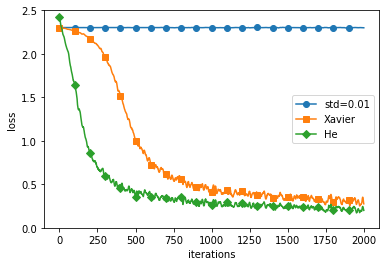

In [33]:
import os
import sys

sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [34]:
class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    
    def forward(self,x,train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self,dout):
        return dout * self.mask